In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt

from grid_maker import make_grid
from Utilities.operators import calc_div, calc_grad, zero_interpolator

In [2]:
gamma = 5/3
mach_min = 1.3
num = 45

In [3]:
gridded_indexes, gridded_den, gridded_T, gridded_P, gridded_Vx, gridded_Vy, gridded_Vz, gridded_V, gridded_Rcell, x_radii, y_radii, z_radii = make_grid(num)

all T=0, bro. CHANGE!
Tree built!


In [4]:
deltax = (x_radii[-1]-x_radii[0])/num

In [5]:
# gradient of T
gradx_delta = []
grady_delta = []
gradz_delta = []
X_cell = [] # len = (len(x_array)-2)**2 i.e. every combination of x and y (without the edges)
Y_cell = []
idx_slice = 22
for i in range(1, len(x_radii)-1):
    for j in range(1,len(y_radii)-1):
        for k in range(idx_slice,idx_slice+1):
            idx = [i,j,k]
            grad =  calc_grad(x_radii, y_radii, z_radii, gridded_T, idx, kind_info = 'idx')
            gradx_delta.append(-grad[0])
            grady_delta.append(-grad[1])
            X_cell.append(x_radii[i])
            Y_cell.append(y_radii[j])

X_cell = np.array(X_cell)
Y_cell = np.array(Y_cell)
gradx_delta = np.array(gradx_delta)
grady_delta = np.array(grady_delta)

In [6]:
flat_T = gridded_T[:,:,idx_slice]
T_plot = np.log10(flat_T)
T_plot = np.nan_to_num(T_plot, neginf = 0)

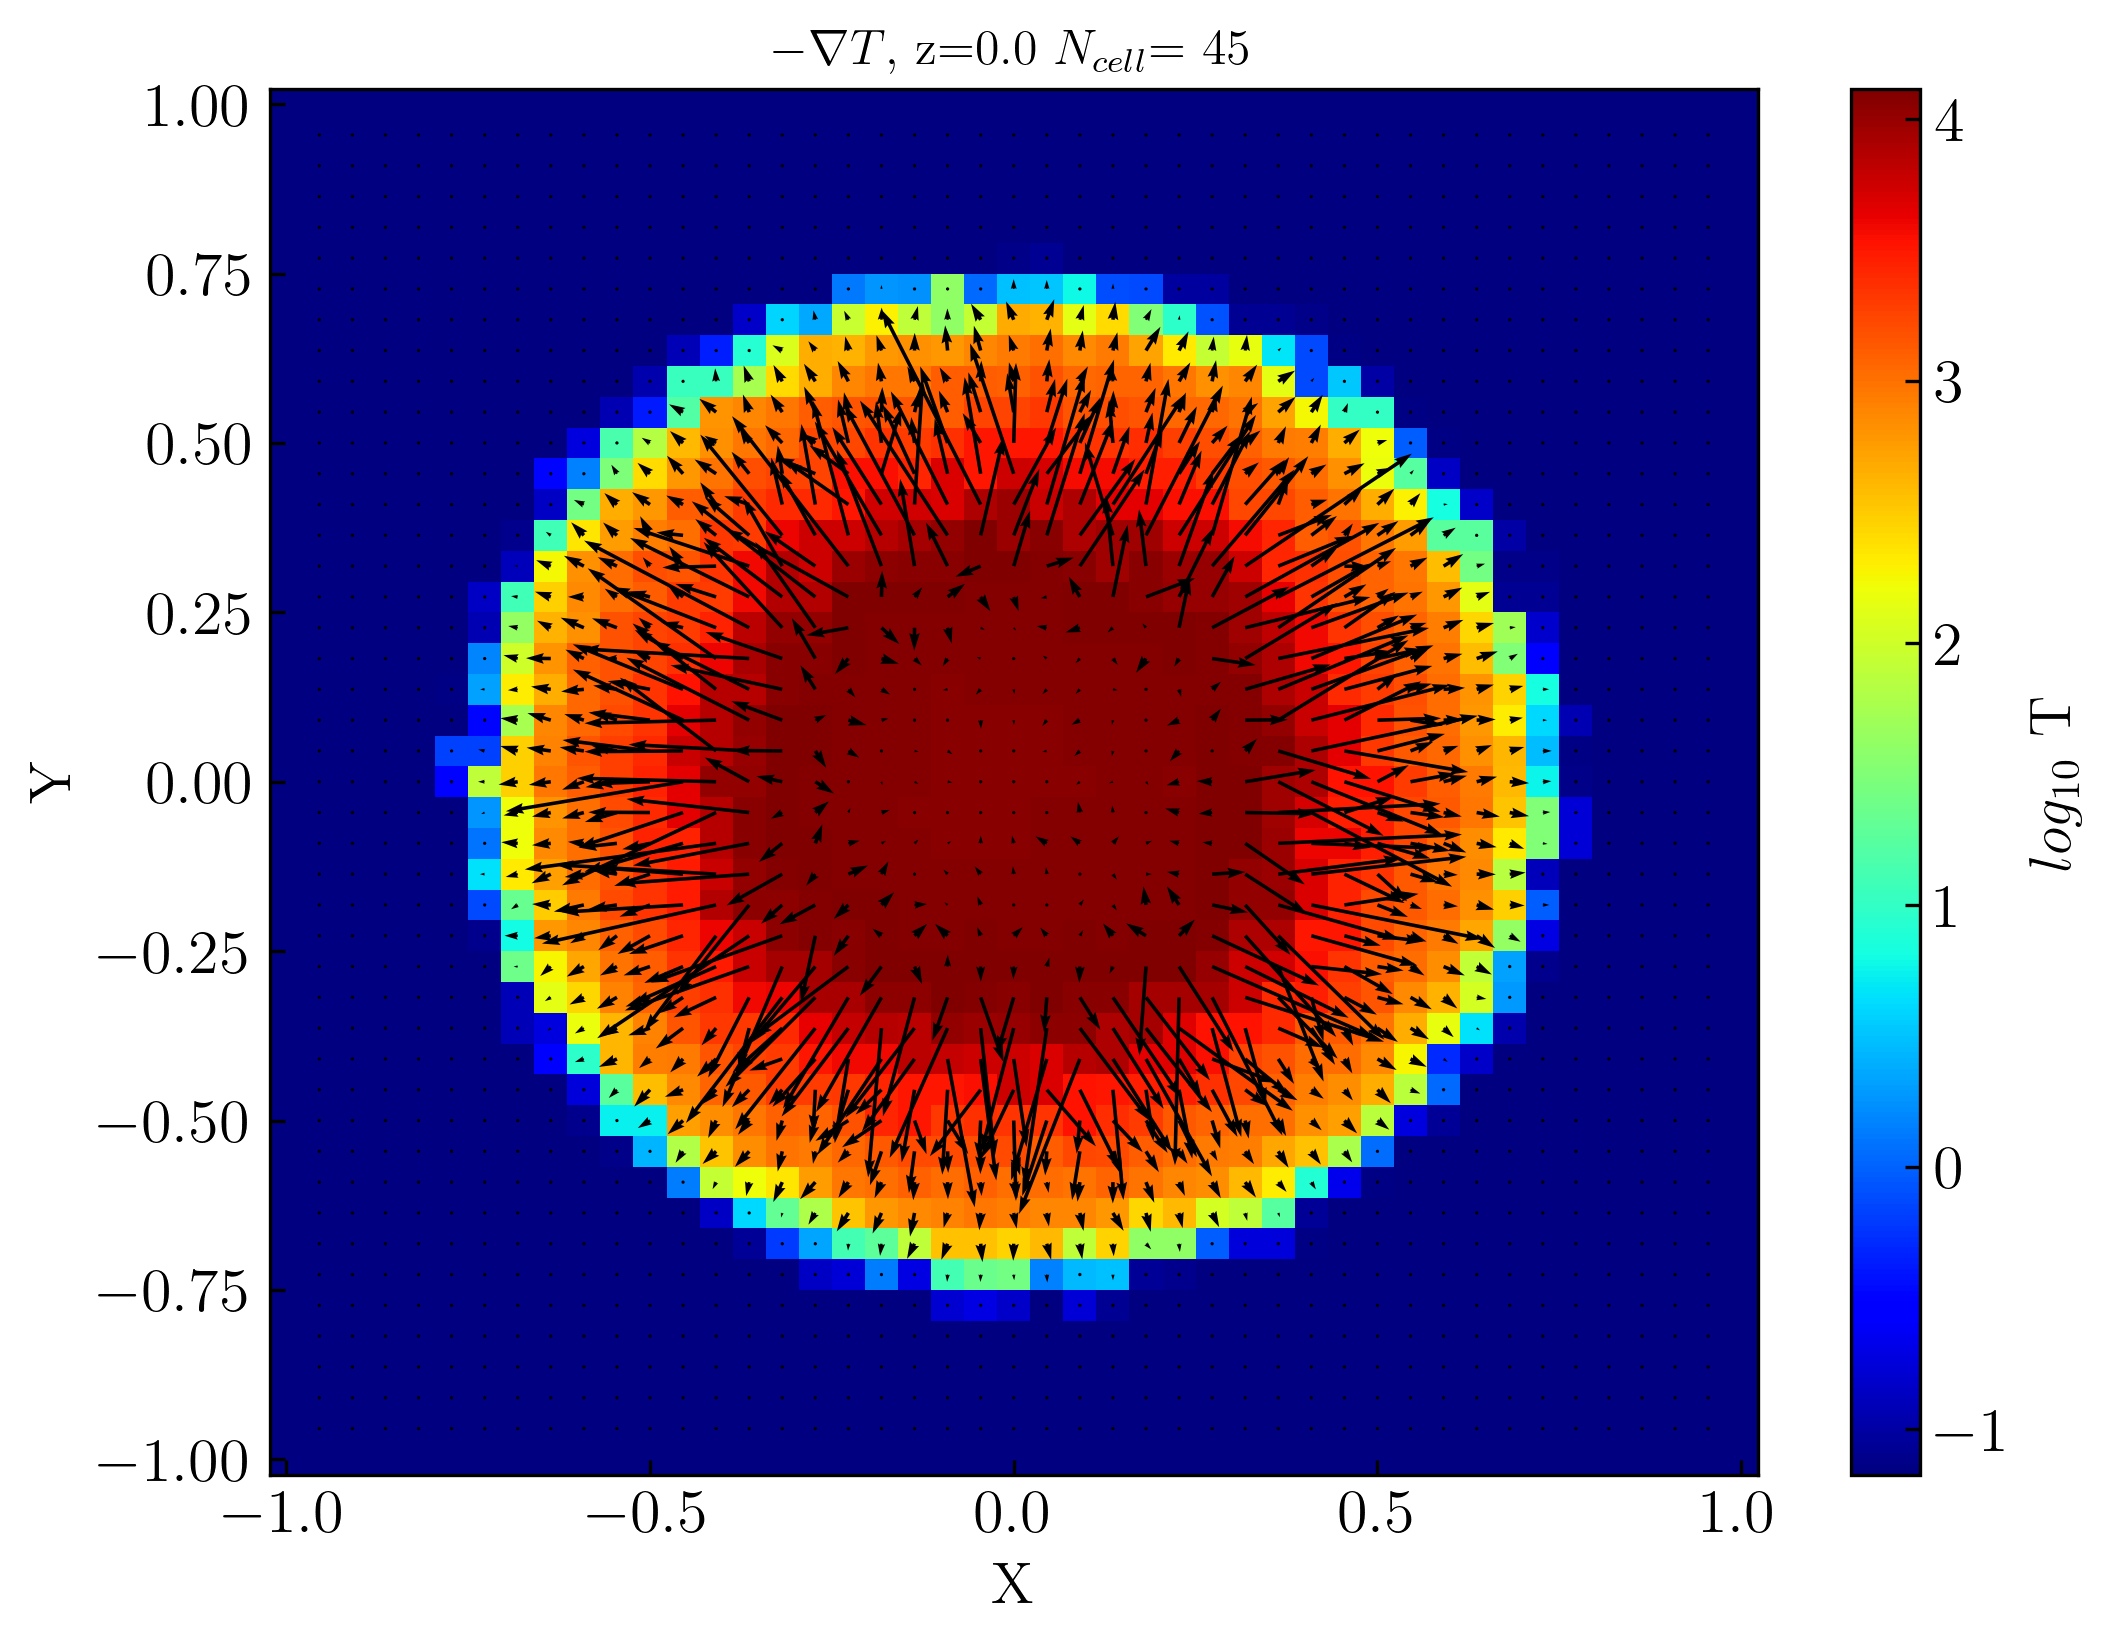

In [7]:
# Gradient T
z_chosen = np.round(z_radii[idx_slice],3)
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
img = ax.pcolormesh(x_radii, y_radii, T_plot.T, cmap = 'jet')
cb = plt.colorbar(img)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax.quiver(X_cell, Y_cell, gradx_delta, grady_delta, color = 'k', angles='xy', scale_units='xy')#, scale=1)# arrow_length_ratio=0.1, color = 'k')
plt.title(r'$-\nabla T$, ' f'z={z_chosen} ' + r' $N_{cell}$'+ f'= {num}')
plt.savefig(f'Figs/Tslice_grad.png')

In [8]:
def shock_direction(x_array, y_array, z_array, Tgrid, idx):
    """ Find shock direction according eq.(5) by Schaal14 in the point of coordinates indices idx"""
    gradT = calc_grad(x_array, y_array, z_array, Tgrid, idx, kind_info = 'idx')
    magnitude = np.linalg.norm(gradT)
    ds = - np.divide(gradT,magnitude)
    return ds

In [9]:
# TEST shock direction
ds_x = []
ds_y = []
ds_z = []
X_ds = []
Y_ds= []
Z_ds = []
for i in range(1, len(x_radii)-1):
    for j in range(1,len(y_radii)-1):
        for k in range(idx_slice,idx_slice+1):
            idx = [i,j,k]
            ds =  shock_direction(x_radii, y_radii, z_radii, gridded_T, idx)
            ds_x.append(ds[0])
            ds_y.append(ds[1])
            ds_z.append(ds[2])
            X_ds.append(x_radii[i])
            Y_ds.append(y_radii[j])
            Z_ds.append(z_radii[k])

X_ds = np.array(X_ds)
Y_ds = np.array(Y_ds)
Z_ds = np.array(Z_ds)
ds_x = np.array(ds_x)
ds_y = np.array(ds_y)
ds_z = np.array(ds_z)

In [10]:
print(ds_x)

[-0.17072119 -0.2140834   0.53729184 ... -0.57363626 -0.56194293
 -0.33531465]


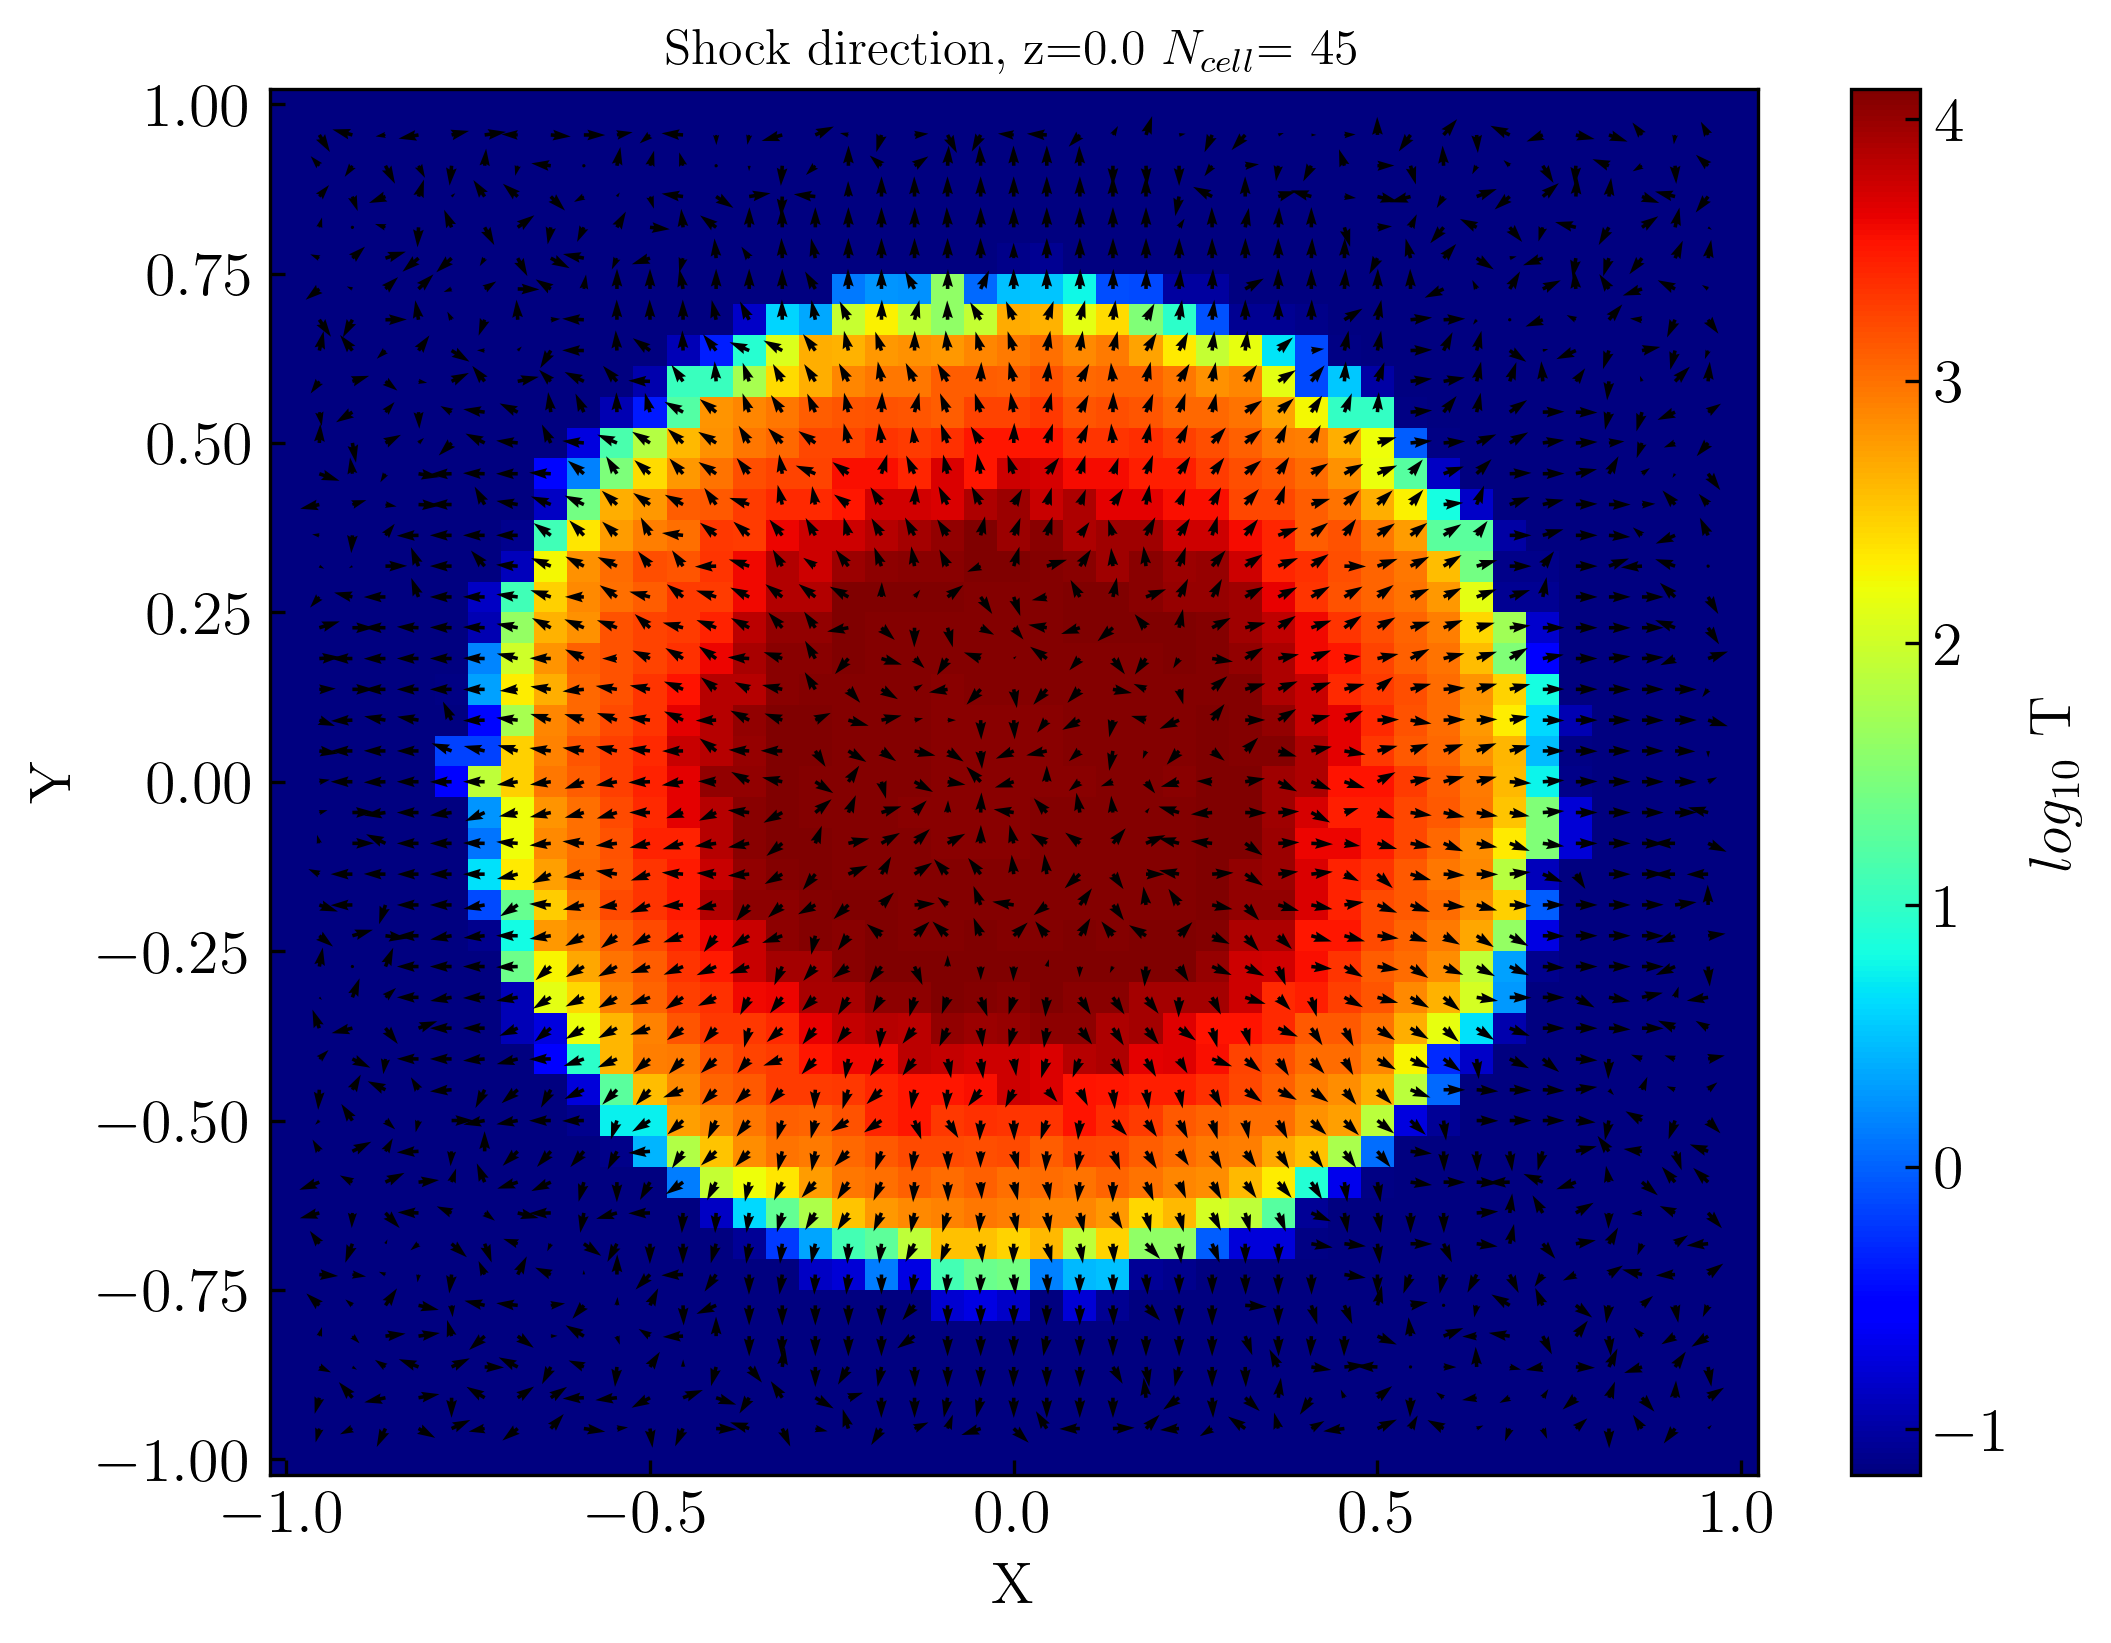

In [16]:
# Shock direction
z_chosen = np.round(z_radii[idx_slice],3)
fig1, ax1 = plt.subplots(1,1)
ax1.set_xlabel('X', fontsize = 14)
ax1.set_ylabel('Y', fontsize = 14)
img = ax1.pcolormesh(x_radii, y_radii, T_plot.T, cmap = 'jet')
cb = plt.colorbar(img)
#plt.xlim(-0.5,0)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax1.quiver(X_ds, Y_ds, ds_x, ds_y, color = 'k', angles='xy', scale_units='xy')#, scale=10)
plt.title(f'Shock direction, z={z_chosen} ' + r' $N_{cell}$'+ f'= {num}')
plt.savefig(f'Figs/shochDir.jpg')

In [13]:
# # TEST shock direction
# ds_x = []
# ds_y = []
# ds_z = []
# X_ds = []
# Y_ds= []
# Z_ds = []
# for i in range(1, len(x_radii)-1):
#     for j in range(1,len(y_radii)-1):
#         for k in range(1,len(z_radii)-1):
#             idx = [i,j,k]
#             ds =  shock_direction(x_radii, y_radii, z_radii, gridded_T, idx)
#             ds_x.append(ds[0])
#             ds_y.append(ds[1])
#             ds_z.append(ds[2])
#             X_ds.append(x_radii[i])
#             Y_ds.append(y_radii[j])
#             Z_ds.append(z_radii[k])

# X_ds = np.array(X_ds)
# Y_ds = np.array(Y_ds)
# Z_ds = np.array(Z_ds)
# ds_x = np.array(ds_x)
# ds_y = np.array(ds_y)
# ds_z = np.array(ds_z)

In [14]:
# postx = X_ds + ds_x * deltax 
# posty = Y_ds + ds_y * deltax
# postz = Z_ds + ds_z * deltax

In [15]:
# fig = plt.figure()
# ax = fig.add_subplot(projection = '3d')
# ax.quiver(X_ds[0:-1:150], Y_ds[0:-1:150], Z_ds[0:-1:150], postx[0:-1:150], posty[0:-1:150], postz[0:-1:150], arrow_length_ratio=0.2, color = 'k')
# ax.set_xlim(-2,2)
# ax.set_ylim(-2,2)
# ax.set_zlim(-2,2)
